# Test Notebook to see if we can load Template

To prepare the system, please run the following code:

In [1]:
%matplotlib inline

Please drag and drop your files into the data folder of this notebook:

Relevant variables:

In [2]:
cluster_extend = 400
threshold = 0
showCross = True

Run the scripts

In [3]:
from volume import *
import numpy as np
import nibabel as nb
from scipy.ndimage import label as sci_label
from matplotlib import pylab
from matplotlib import pyplot as plt
from nipy.labs import viz
from os.path import join as opj
from os.path import basename as opb
from glob import glob as gg
from IPython.display import Image, display
import shutil

fileList = gg('data/*')

for fpath in fileList:
  
    img = nb.load(fpath)
    data = img.get_data()
    affine = img.get_affine()
    labels, nlabels = get_labels(data, threshold=threshold, min_extent=cluster_extend)

    if nlabels == 0:
        continue
    
    # Catch if nlabels is 0, i.e. no clusters survived thresholding
    #     Should an output be created if no cluster survives thresholding?
    coords, valuesInfo = get_cluster_info(labels, affine, data)
    
    # Get file prefix
    if fpath.endswith('.nii'):
        filename = opb(fpath)[:-4]
    elif fpath.endswith('.nii.gz'):
        filename = opb(fpath)[:-7]

    show_slices(data, affine, coords, cmap=pylab.cm.hot, prefix=filename, show_colorbar=True, formatter='%d',
                showCross=showCross)
    
    header='X,Y,Z,Size,Max,Min,Mean,Std'
    np.savetxt(opj('figures', filename+'.csv'), valuesInfo, delimiter=',', fmt='%.8f', header=header)
    
shutil.make_archive('outputs', 'zip', 'figures')

volume.py:15: RuntimeWarning: invalid value encountered in greater
  binarized_data = abs(data) > threshold


'/home/mnotter/BrainsForPublication/notebooks/outputs.zip'

Look at the figures

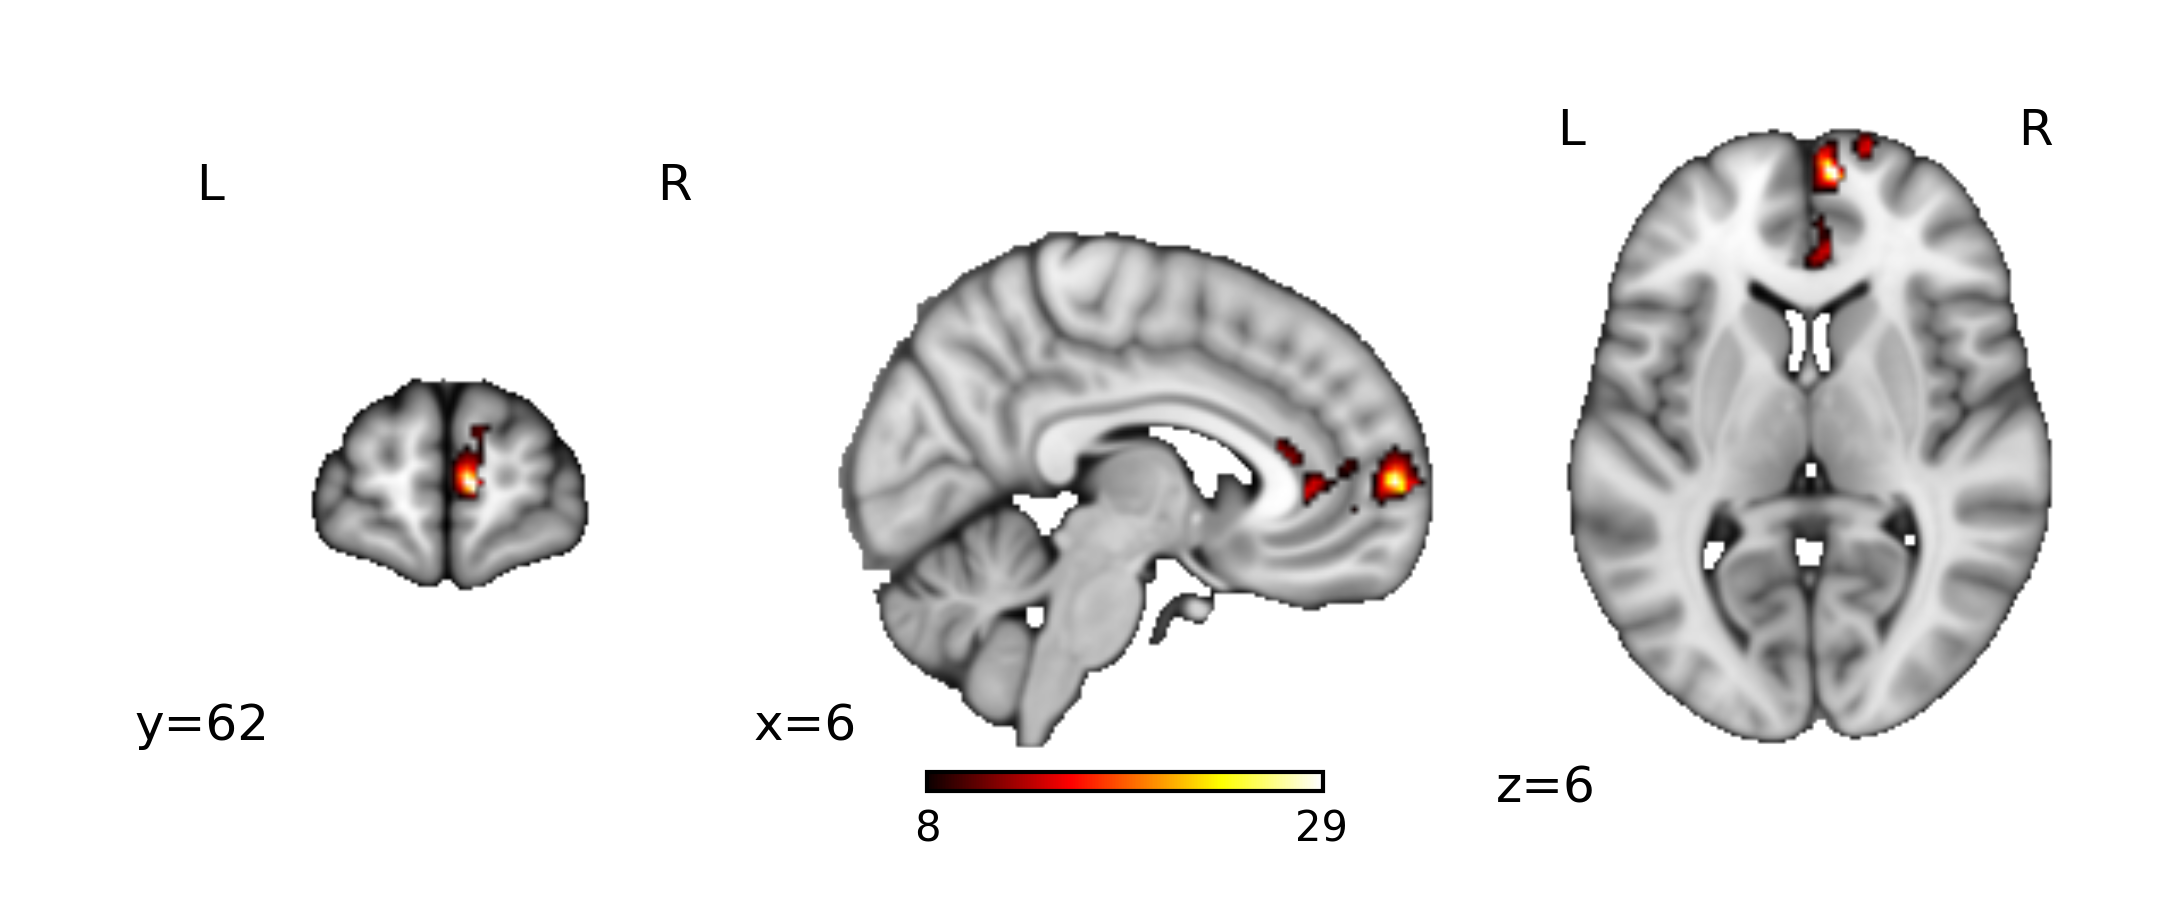

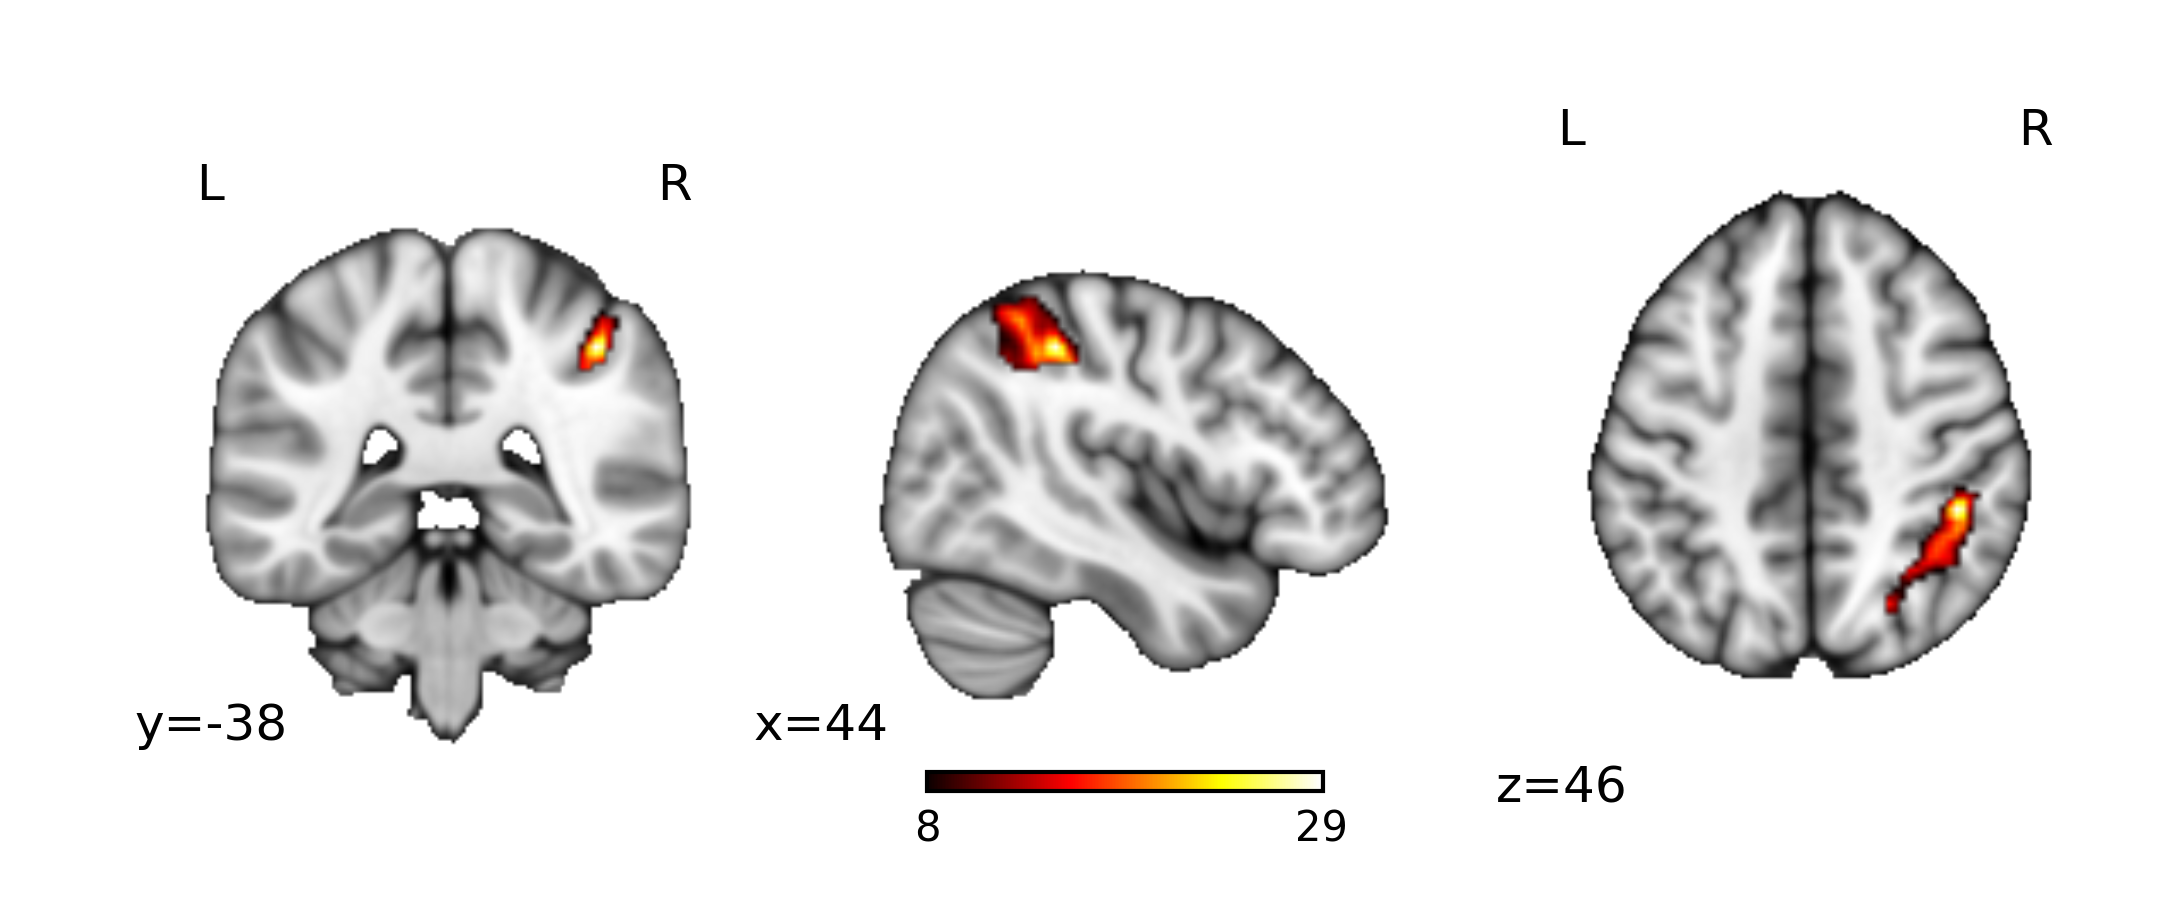

In [7]:
outputs = gg('figures/*.png')
for o in outputs:
    a = Image(filename=o)
    display(a)